# Entrenamiento 

# 1. Configurar espacio de trabajo

## 1.1. Instalar librerías necesarias

In [3]:
!pip install ultralytics
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install opencv-python matplotlib tensorboard
!pip install openvino-dev

Looking in indexes: https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 11.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 11.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 8.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 11.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.3/227.3 kB 5.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 11.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.7/38.7 MB 4.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.6 MB/s eta 0:00:0000:010

## 1.2. Importar librerías necesarias

In [56]:
import os
import shutil
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import openvino.runtime as ov
from openvino.runtime import Core
import random
import time
import numpy as np
import warnings
import pandas as pd

# Suprimir advertencias temporales
warnings.filterwarnings('ignore')


# 2. Entrenamiento inicial

## 2.1. Definir rutas y crear directorios

In [2]:
# Ruta al yaml del dataset
dataset_path = os.path.abspath('Data/Splitted_Dataset/dataset.yaml')

# Directorio para resultados
results_dir = './Results'
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

## 2.2. Cargar el modelo y realizar el primer entrenamiento

In [4]:
# Cargar modelo YOLOv8
model = YOLO('yolov8n.pt')

# Configurar entrenamiento
model.train(data=dataset_path,
            epochs=10,  # Cantidad de épocas
            batch=16,  # Tamaño del batch
            imgsz=640,  # Tamaño de las imágenes
            project=results_dir,
            name='yolov8_training',
            exist_ok=True)

100%|██████████| 6.25M/6.25M [00:01<00:00, 6.34MB/s]


Ultralytics YOLOv8.2.66 🚀 Python-3.12.3 torch-2.4.0+cu121 CPU (Intel Core(TM) i7-10510U 1.80GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/salvanya/TP-CV2/Data/Splitted_Dataset/dataset.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=./Results, name=yolov8_training, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

100%|██████████| 755k/755k [00:00<00:00, 3.77MB/s]

Overriding model.yaml nc=80 with nc=49

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]                  
 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 

/home/salvanya/TP-CV2/TP-CV2/lib/python3.12/site-packages/ultralytics/engine/trainer.py:268: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning /home/salvanya/TP-CV2/Data/Splitted_Dataset/train/labels... 4276 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4276/4276 [00:38<00:00, 109.87it/s]

train: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/train/images/0174.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/train/images/0177.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/train/images/0178.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/train/images/0179.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/train/images/0181.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/train/images/0182.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/train/images/0183.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/train/images/0184.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/tr

train: New cache created: /home/salvanya/TP-CV2/Data/Splitted_Dataset/train/labels.cache


val: Scanning /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/labels... 229 images, 0 backgrounds, 0 corrupt: 100%|██████████| 229/229 [00:06<00:00, 37.53it/s] 

val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0175.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0185.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0197.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0431.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0436.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0438.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0441.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0454.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0484.jpg: corrupt JPEG re

val: New cache created: /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/labels.cache
Plotting labels to Results/yolov8_training/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000189, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to Results/yolov8_training
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.417      4.411      1.455         26        640: 100%|██████████| 268/268 [46:30<00:00, 10.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:05<00:00,  8.14s/it]

                   all        229       1413     0.0906       0.12     0.0334     0.0251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.445      3.568      1.509         19        640: 100%|██████████| 268/268 [53:00<00:00, 11.87s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:06<00:00,  8.27s/it]

                   all        229       1413      0.138      0.276      0.136     0.0992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.449      3.009      1.511         27        640: 100%|██████████| 268/268 [52:23<00:00, 11.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [01:06<00:00,  8.33s/it]

                   all        229       1413      0.317      0.393      0.308      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.402      2.628       1.47         23        640: 100%|██████████| 268/268 [44:01<00:00,  9.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:49<00:00,  6.16s/it]

                   all        229       1413      0.432      0.405      0.389      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.359      2.351      1.446         28        640: 100%|██████████| 268/268 [45:09<00:00, 10.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:56<00:00,  7.08s/it]

                   all        229       1413      0.538      0.441      0.467      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.328      2.185       1.41         36        640: 100%|██████████| 268/268 [37:42<00:00,  8.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:50<00:00,  6.35s/it]

                   all        229       1413      0.582      0.455      0.489      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.291      2.053      1.388         29        640: 100%|██████████| 268/268 [32:57<00:00,  7.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:41<00:00,  5.16s/it]

                   all        229       1413      0.552      0.501      0.511      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.268       1.95      1.363         28        640: 100%|██████████| 268/268 [34:04<00:00,  7.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:39<00:00,  4.88s/it]

                   all        229       1413      0.591      0.513      0.529      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G       1.24      1.877       1.34         24        640: 100%|██████████| 268/268 [34:15<00:00,  7.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:47<00:00,  5.94s/it]

                   all        229       1413      0.617      0.493      0.538      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.224      1.835      1.327         23        640: 100%|██████████| 268/268 [32:08<00:00,  7.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:44<00:00,  5.56s/it]

                   all        229       1413      0.631      0.499      0.543      0.405



10 epochs completed in 7.032 hours.
Optimizer stripped from Results/yolov8_training/weights/last.pt, 6.2MB
Optimizer stripped from Results/yolov8_training/weights/best.pt, 6.2MB

Validating Results/yolov8_training/weights/best.pt...
Ultralytics YOLOv8.2.66 🚀 Python-3.12.3 torch-2.4.0+cu121 CPU (Intel Core(TM) i7-10510U 1.80GHz)
Model summary (fused): 168 layers, 3,015,203 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:36<00:00,  4.55s/it]


                   all        229       1413      0.631      0.497      0.543      0.404
                    1O         23         23          1      0.602       0.75      0.526
                    1C         26         26      0.747      0.615      0.704      0.528
                    1E         37         37      0.741      0.622      0.636      0.507
                    1B         24         24      0.821      0.667      0.696      0.522
                    2O         32         33      0.724      0.557      0.621      0.478
                    2C         23         23      0.533      0.522       0.46       0.36
                    2E         31         31      0.794      0.613      0.645      0.423
                    2B         30         30       0.76        0.6       0.62      0.453
                    3O         30         30      0.501        0.5      0.496      0.377
                    3C         34         34      0.464      0.441      0.465      0.324
                    3

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fa2c1bb7350>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.0340

## 2.3. Volver a calcular las métricas de validación 

In [44]:
# Ruta de los resultados
results_dir = './Results'
trained_model = './Results/yolov8_training/weights/best.pt'

# Crear carpeta de resultados si no existe
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

# Cargar el modelo YOLOv8
model = YOLO(trained_model) 

# Definir ruta del dataset de validación
dataset_path = './Data/Splitted_Dataset/val'

# Evaluar modelo en conjunto de validación
metrics = model.val()

# Extraer y mostrar métricas
metrics_file_path = os.path.join(results_dir, 'metrics.txt')
with open(metrics_file_path, 'w') as f:
    for i, class_name in enumerate(metrics.names):
        class_metrics = metrics.class_result(i)
        precision = class_metrics[0]
        recall = class_metrics[1]
        map50 = class_metrics[2]
        map50_95 = class_metrics[3]
        f1_score = 2 * (precision * recall) / (precision + recall)
        
        metrics_line = (f"Clase: {class_name} (ID: {i})\n"
                        f"Precisión: {precision:.4f}\n"
                        f"Recall: {recall:.4f}\n"
                        f"mAP50: {map50:.4f}\n"
                        f"mAP50-95: {map50_95:.4f}\n"
                        f"F1 Score: {f1_score:.4f}\n\n")
        
        print(metrics_line)
        f.write(metrics_line)

print(f"Métricas guardadas en {metrics_file_path}")


Ultralytics YOLOv8.2.66 🚀 Python-3.12.3 torch-2.4.0+cu121 CPU (Intel Core(TM) i7-10510U 1.80GHz)
Model summary (fused): 168 layers, 3,015,203 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/labels.cache... 229 images, 0 backgrounds, 0 corrupt: 100%|██████████| 229/229 [00:00<?, ?it/s]

val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0175.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0185.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0197.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0431.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0436.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0438.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0441.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0454.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0484.jpg: corrupt JPEG re


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:41<00:00,  2.75s/it]


                   all        229       1413      0.633        0.5      0.543      0.405
                    1O         23         23          1      0.643      0.754      0.524
                    1C         26         26      0.745      0.615      0.698       0.53
                    1E         37         37      0.731      0.622      0.643      0.509
                    1B         24         24       0.77      0.667      0.695      0.519
                    2O         32         33      0.728      0.568      0.624      0.476
                    2C         23         23      0.534      0.522      0.454      0.356
                    2E         31         31       0.79      0.613      0.644      0.426
                    2B         30         30      0.767        0.6      0.618      0.445
                    3O         30         30      0.511        0.5      0.499      0.381
                    3C         34         34      0.475      0.441      0.471      0.332
                    3

# 3. Mostrar detecciones de ejemplo


0: 640x480 1 7O, 1 8O, 1 8B, 2 9Os, 1 9B, 1 11O, 149.0ms
Speed: 2.9ms preprocess, 149.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)


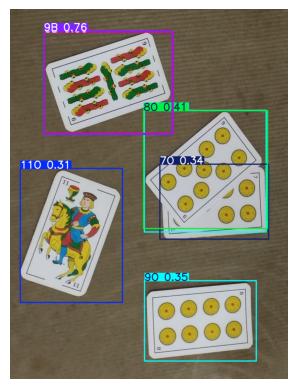


0: 640x480 1 1O, 1 1C, 1 1E, 1 2C, 1 3C, 1 6C, 2 7Os, 1 8E, 61.2ms
Speed: 4.1ms preprocess, 61.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


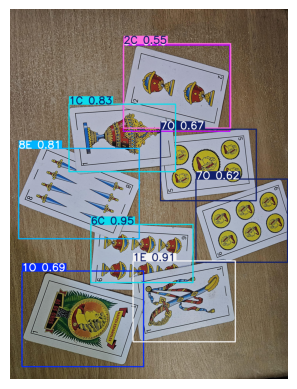


0: 544x640 2 1Es, 1 7C, 1 8B, 1 10E, 1 10B, 115.6ms
Speed: 3.1ms preprocess, 115.6ms inference, 0.7ms postprocess per image at shape (1, 3, 544, 640)


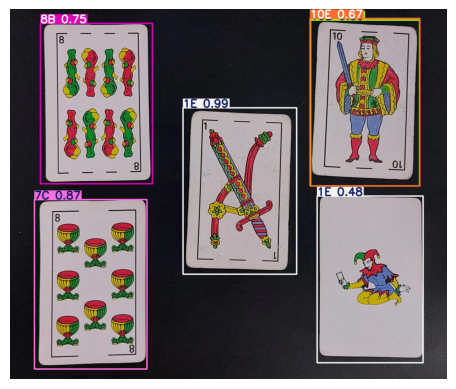


0: 640x480 1 4B, 1 7B, 66.1ms
Speed: 3.6ms preprocess, 66.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


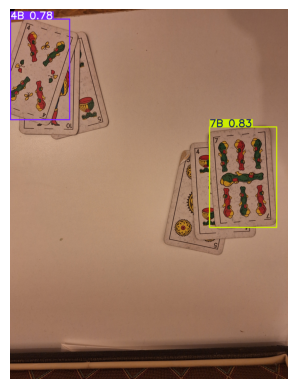


0: 480x640 2 1Os, 1 2C, 1 3C, 1 3E, 1 5O, 2 5Es, 1 6C, 1 10C, 2 11Cs, 1 11E, 1 11B, 83.5ms
Speed: 2.6ms preprocess, 83.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


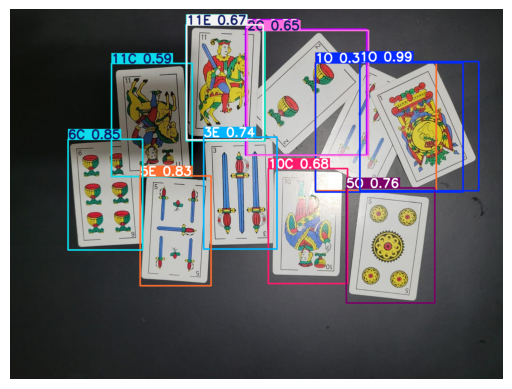


0: 640x480 1 4B, 1 5O, 1 6E, 1 7E, 2 10Es, 1 10B, 1 11B, 63.2ms
Speed: 2.9ms preprocess, 63.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


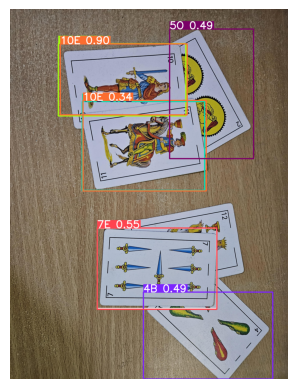


0: 480x640 1 4C, 1 4B, 1 7B, 2 9Cs, 1 10C, 62.4ms
Speed: 2.8ms preprocess, 62.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


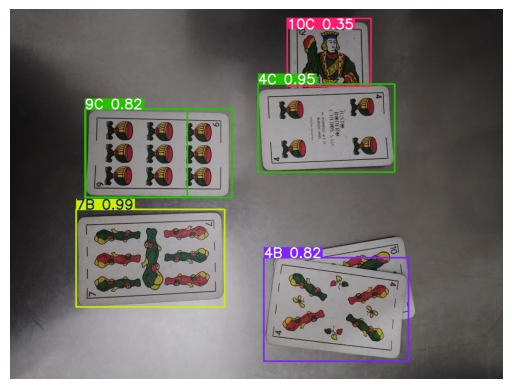


0: 640x480 1 3O, 1 3B, 1 5O, 1 6C, 1 7C, 67.4ms
Speed: 2.7ms preprocess, 67.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


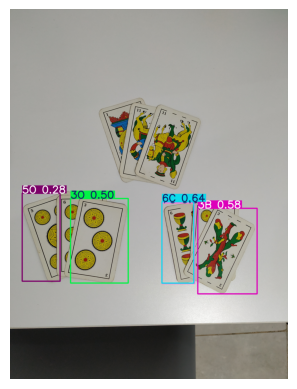


0: 640x640 1 3E, 1 6C, 1 7C, 1 8C, 1 8B, 1 12E, 84.9ms
Speed: 5.0ms preprocess, 84.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


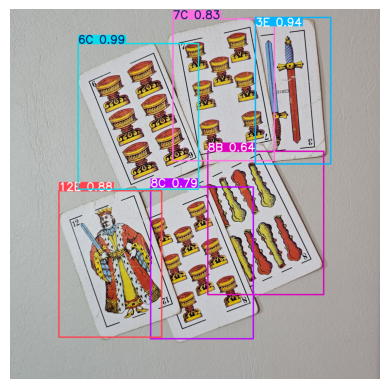


0: 480x640 1 2C, 1 10E, 1 11B, 1 12B, 100.6ms
Speed: 2.4ms preprocess, 100.6ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


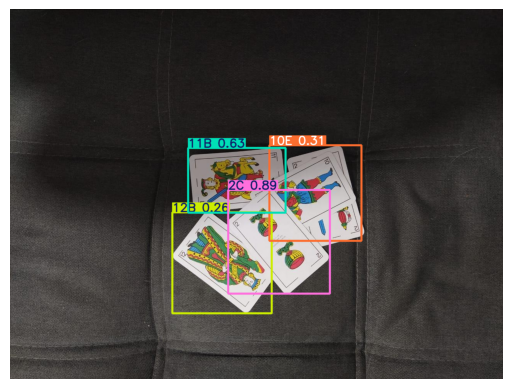

In [26]:
# Directorio de validación
val_images = os.path.join('./Data/Splitted_Dataset/val/images')


# Visualización de algunas detecciones
def visualize_detections(model, images_dir, num_images=10):
    image_files = [os.path.join(images_dir, f) for f in os.listdir(images_dir) if f.endswith('.jpg')]
    
    # Seleccionar imágenes al azar
    random_images = random.sample(image_files, min(num_images, len(image_files)))
    
    for i, image_path in enumerate(random_images):
        img = Image.open(image_path)
        results = model(img)
        
        # Iterar sobre los resultados y plotear las detecciones
        for result in results:
            annotated_img = result.plot()
            
            # Convertir de BGR a RGB
            annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
            
            # Mostrar la imagen anotada
            plt.imshow(annotated_img_rgb)
            plt.axis('off')
            plt.savefig(os.path.join(results_dir, f'detection_{i}.png'))
            plt.show()

# Llamado a la función
visualize_detections(model, val_images)


# 4. Optimización con OpenVINO

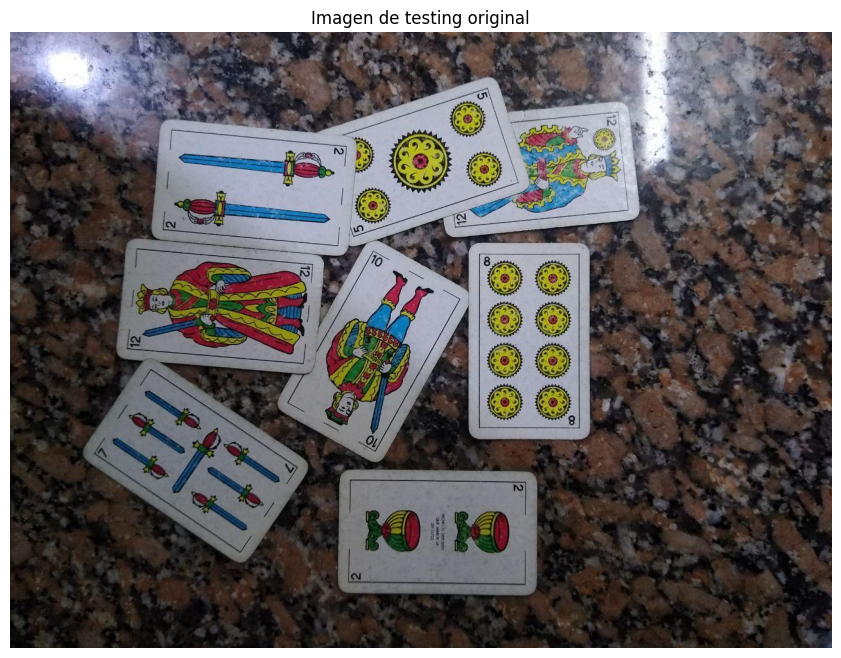


0: 480x640 1 2C, 1 2E, 1 5O, 1 7E, 1 8O, 1 9O, 1 10E, 1 12O, 1 12E, 176.5ms
Speed: 3.1ms preprocess, 176.5ms inference, 5.7ms postprocess per image at shape (1, 3, 480, 640)
Imagen aleatoria seleccionada: Data/Splitted_Dataset/test/images/0935.jpg
Tiempo de inferencia en YOLOv8: 2.1386 seconds
Tiempo de inferencia con OpenVINO: 0.0724 seconds
Mejora en la velocidad: 29.55x


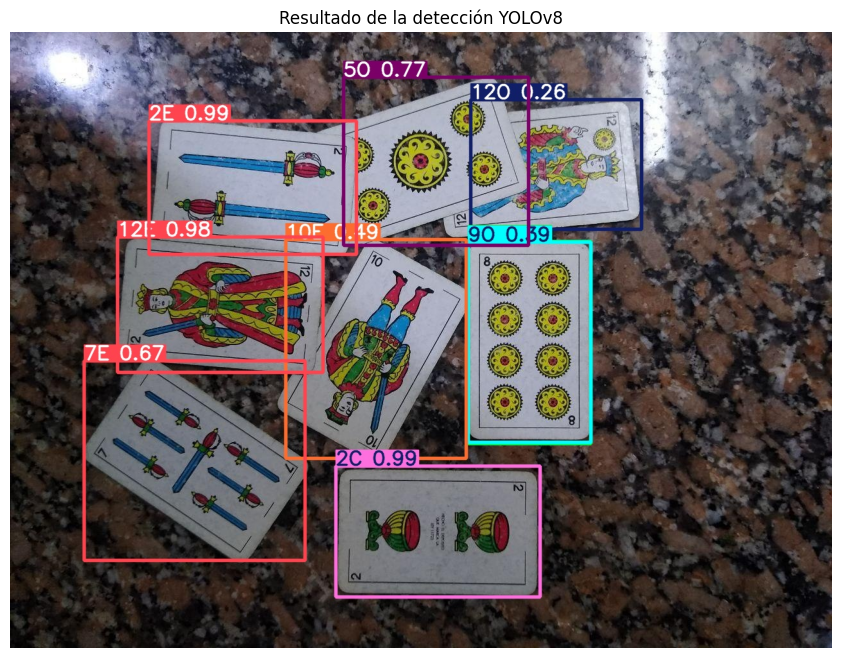

In [53]:
# Caragar una imagen aleatoria del direcotrio de testing
def load_random_test_image(test_path):
    image_files = [f for f in os.listdir(test_path) if f.lower().endswith(('.jpg'))]
    random_image = random.choice(image_files)
    image_path = os.path.join(test_path, random_image)
    return cv2.imread(image_path), image_path

# Hacer inferencia con el modelo YOLO de base
def yolov8_inference(model, image):
    start_time = time.time()
    results = model(image)
    end_time = time.time()
    return results, end_time - start_time

# Hacer inferencia con el modelo optimizado con OpenVINO
def openvino_inference(ov_model, image):
    input_layer = ov_model.input(0)
    output_layer = ov_model.output(0)
    
    # Preprocesar la imagen
    resized_image = cv2.resize(image, (640, 640))
    input_image = np.expand_dims(resized_image.transpose(2, 0, 1), 0).astype(np.float32) / 255.0
    
    start_time = time.time()
    results = ov_model([input_image])[output_layer]
    end_time = time.time()
    return results, end_time - start_time

# Mostrar imagen
def display_image(image_path, title):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 8))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Cargar los pesos del modelo
model_path = 'Results/yolov8_training/weights/best.pt'
model = YOLO(model_path)

# Cargar una imagen aleatoria del set de testing
test_path = 'Data/Splitted_Dataset/test/images'
image, image_path = load_random_test_image(test_path)

# Mostrar imagen original
display_image(image_path, "Imagen de testing original")

# Inferencia con YOLOv8
yolo_results, yolo_time = yolov8_inference(model, image)

# Convertir el modelo YOLOv8 a ONNX
onnx_path = 'Results/yolov8_training/weights/best.onnx'
if not os.path.exists(onnx_path):
    model.export(format='onnx', opset=12)

# Inicializar OpenVINO

ie = Core()
ov_model = ie.read_model(onnx_path)
compiled_model = ie.compile_model(ov_model, "CPU")

# OpenVINO inference
ov_results, ov_time = openvino_inference(compiled_model, image)

print(f"Imagen aleatoria seleccionada: {image_path}")
print(f"Tiempo de inferencia en YOLOv8: {yolo_time:.4f} seconds")
print(f"Tiempo de inferencia con OpenVINO: {ov_time:.4f} seconds")
print(f"Mejora en la velocidad: {yolo_time / ov_time:.2f}x")

# Save and display YOLOv8 results
yolo_result_path = 'Results/yolo_result.jpg'
yolo_results[0].save(yolo_result_path)
display_image(yolo_result_path, "Resultado de la detección YOLOv8")

# 5. Reentrenamiento con otros hiperparámetros

## 5.1. Reentrenamiento

In [54]:
# Función para cargar y continuar el entrenamiento del modelo YOLOv8
def retrain_yolov8(checkpoint_path, data_path, results_dir, epochs=10, batch_size=16, img_size=640, learning_rate=0.01, final_lr=0.01, l2_regularization=0.0005, momentum=0.937):
    # Cargar modelo YOLOv8 desde el checkpoint
    model = YOLO(checkpoint_path) 

    # Configurar entrenamiento
    model.train(data=data_path,
                epochs=epochs,
                batch=batch_size,
                lr0=learning_rate,
                lrf=final_lr,
                weight_decay=l2_regularization,
                imgsz=img_size,
                project=results_dir,
                momentum=momentum,
                name='yolov8_retraining',
                exist_ok=True)

    # Evaluar modelo en conjunto de validación
    metrics = model.val()

    # Mostrar métricas
    print("Metrics: ", metrics)

    # Guardar métricas en un archivo
    with open(os.path.join(results_dir, 'metrics.txt'), 'a') as f:
        f.write(f'\n\nRetraining Metrics: {metrics}')

    return model

In [38]:
# Rutas a directorios
dataset_path = os.path.abspath('Data/Splitted_Dataset/dataset.yaml')
results_dir = './Results'

# Directorio para los checkpoints
checkpoints_dir = os.path.join(results_dir, 'checkpoints')
if not os.path.exists(checkpoints_dir):
    os.makedirs(checkpoints_dir)

# Ruta al último checkpoint
last_checkpoint_path = os.path.join(results_dir, 'weights/best.pt')  

# Reentrenamiento con nuevos hiperparámetros
model = retrain_yolov8(checkpoint_path=last_checkpoint_path, 
                       data_path=dataset_path, 
                       results_dir=results_dir, 
                       epochs=20, # Cantidad de épocas
                       batch_size=10, # Tamaño del lote 
                       img_size=640, # Tamaño de imagen
                       learning_rate=0.02, # Tasa de aprendizaje 
                       final_lr=0.01, # Porcentaje final de la tasa de aprendizaje inicial
                       l2_regularization=0.0008, # Término de regularización L2 (Ridge)
                       momentum=0.937 # Factor de Momentum para la optimización
                       )

# Guardar el nuevo checkpoint
new_checkpoint_path = os.path.join(checkpoints_dir, 'retrained_checkpoint.pt')
model.save(new_checkpoint_path)

print("Reentrenamiento completado y modelo guardado.")


Ultralytics YOLOv8.2.66 🚀 Python-3.12.3 torch-2.4.0+cu121 CPU (Intel Core(TM) i7-10510U 1.80GHz)
engine/trainer: task=detect, mode=train, model=./Results/yolov8_training/weights/best.pt, data=/home/salvanya/TP-CV2/Data/Splitted_Dataset/dataset.yaml, epochs=20, time=None, patience=100, batch=10, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=./Results/yolov8_training, name=yolov8_retraining, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_

train: Scanning /home/salvanya/TP-CV2/Data/Splitted_Dataset/train/labels.cache... 4276 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4276/4276 [00:00<?, ?it/s]

train: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/train/images/0174.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/train/images/0177.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/train/images/0178.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/train/images/0179.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/train/images/0181.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/train/images/0182.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/train/images/0183.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/train/images/0184.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/tr


val: Scanning /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/labels.cache... 229 images, 0 backgrounds, 0 corrupt: 100%|██████████| 229/229 [00:00<?, ?it/s]

val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0175.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0185.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0197.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0431.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0436.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0438.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0441.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0454.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0484.jpg: corrupt JPEG re

Plotting labels to Results/yolov8_training/yolov8_retraining/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.02' and 'momentum=1' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000189, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00075), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to Results/yolov8_training/yolov8_retraining
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.381      2.353      1.379         64        640: 100%|██████████| 428/428 [38:14<00:00,  5.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:50<00:00,  4.21s/it]

                   all        229       1413      0.604      0.477      0.529      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.351      2.172       1.36         56        640: 100%|██████████| 428/428 [34:02<00:00,  4.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:39<00:00,  3.27s/it]

                   all        229       1413      0.577      0.498      0.537      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G       1.35      2.062       1.36         84        640: 100%|██████████| 428/428 [32:53<00:00,  4.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:37<00:00,  3.16s/it]

                   all        229       1413      0.629      0.493      0.536      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.318      1.974      1.345         58        640: 100%|██████████| 428/428 [32:39<00:00,  4.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:39<00:00,  3.31s/it]

                   all        229       1413       0.63      0.538      0.562      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G       1.29      1.897      1.319         88        640: 100%|██████████| 428/428 [32:36<00:00,  4.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:37<00:00,  3.15s/it]

                   all        229       1413      0.672      0.515      0.578      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.277      1.827       1.32         64        640: 100%|██████████| 428/428 [33:28<00:00,  4.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:38<00:00,  3.20s/it]

                   all        229       1413      0.705      0.516       0.59      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.262      1.766      1.302         54        640: 100%|██████████| 428/428 [33:48<00:00,  4.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:39<00:00,  3.27s/it]

                   all        229       1413      0.681      0.558      0.601      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.225      1.686       1.28         84        640: 100%|██████████| 428/428 [34:01<00:00,  4.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:39<00:00,  3.27s/it]

                   all        229       1413      0.712      0.548      0.617      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.214      1.639      1.274         67        640: 100%|██████████| 428/428 [35:03<00:00,  4.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:43<00:00,  3.66s/it]

                   all        229       1413      0.733      0.551      0.622      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.202      1.603      1.264         68        640: 100%|██████████| 428/428 [35:48<00:00,  5.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:46<00:00,  3.87s/it]

                   all        229       1413      0.721      0.549      0.628      0.464


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.125      1.364      1.264         36        640: 100%|██████████| 428/428 [36:38<00:00,  5.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:42<00:00,  3.51s/it]

                   all        229       1413      0.779      0.543       0.64      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.099      1.288       1.24         36        640: 100%|██████████| 428/428 [36:26<00:00,  5.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:42<00:00,  3.55s/it]

                   all        229       1413      0.785      0.542      0.642      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      1.074      1.235      1.228         32        640: 100%|██████████| 428/428 [37:37<00:00,  5.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:45<00:00,  3.79s/it]

                   all        229       1413      0.755       0.56      0.649      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.057      1.201      1.215         43        640: 100%|██████████| 428/428 [36:51<00:00,  5.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:38<00:00,  3.19s/it]

                   all        229       1413      0.738      0.576      0.654      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G       1.04      1.171      1.207         37        640: 100%|██████████| 428/428 [31:16<00:00,  4.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:37<00:00,  3.12s/it]

                   all        229       1413      0.777      0.557      0.653      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      1.025      1.135      1.192         36        640: 100%|██████████| 428/428 [32:14<00:00,  4.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:38<00:00,  3.22s/it]

                   all        229       1413      0.779      0.562      0.649      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.006      1.106      1.178         39        640: 100%|██████████| 428/428 [32:25<00:00,  4.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:36<00:00,  3.05s/it]

                   all        229       1413      0.751      0.577      0.654       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G     0.9978      1.096      1.171         36        640: 100%|██████████| 428/428 [40:32<00:00,  5.68s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:55<00:00,  4.63s/it]

                   all        229       1413      0.787      0.565      0.656      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G     0.9839       1.07      1.166         31        640: 100%|██████████| 428/428 [41:50<00:00,  5.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:59<00:00,  4.95s/it]

                   all        229       1413      0.776      0.572      0.657      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.9713      1.055      1.156         39        640: 100%|██████████| 428/428 [42:08<00:00,  5.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:43<00:00,  3.65s/it]

                   all        229       1413        0.8       0.56      0.655      0.495



20 epochs completed in 12.098 hours.
Optimizer stripped from Results/yolov8_training/yolov8_retraining/weights/last.pt, 6.2MB
Optimizer stripped from Results/yolov8_training/yolov8_retraining/weights/best.pt, 6.2MB

Validating Results/yolov8_training/yolov8_retraining/weights/best.pt...
Ultralytics YOLOv8.2.66 🚀 Python-3.12.3 torch-2.4.0+cu121 CPU (Intel Core(TM) i7-10510U 1.80GHz)
Model summary (fused): 168 layers, 3,015,203 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:40<00:00,  3.38s/it]


                   all        229       1413      0.775      0.571      0.656      0.495
                    1O         23         23      0.945      0.748      0.833      0.593
                    1C         26         26      0.848      0.692      0.773      0.583
                    1E         37         37      0.821      0.595      0.685      0.504
                    1B         24         24      0.921      0.667      0.741      0.583
                    2O         32         33      0.993      0.636      0.752      0.507
                    2C         23         23      0.645      0.652      0.577      0.461
                    2E         31         31      0.874      0.673      0.719      0.524
                    2B         30         30      0.715      0.633      0.652      0.487
                    3O         30         30      0.865      0.567      0.647      0.499
                    3C         34         34      0.817      0.526      0.602      0.486
                    3

val: Scanning /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/labels.cache... 229 images, 0 backgrounds, 0 corrupt: 100%|██████████| 229/229 [00:00<?, ?it/s]

val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0175.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0185.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0197.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0431.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0436.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0438.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0441.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0454.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0484.jpg: corrupt JPEG re


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:37<00:00,  1.62s/it]


                   all        229       1413       0.78      0.568      0.656      0.496
                    1O         23         23      0.944      0.739      0.833      0.594
                    1C         26         26      0.857      0.689      0.772      0.587
                    1E         37         37      0.824      0.595      0.685      0.502
                    1B         24         24      0.926      0.667      0.739      0.582
                    2O         32         33      0.996      0.636      0.752      0.505
                    2C         23         23      0.647      0.652      0.572      0.457
                    2E         31         31      0.874       0.67      0.719      0.521
                    2B         30         30      0.733      0.633      0.652      0.487
                    3O         30         30      0.868      0.567      0.646      0.498
                    3C         34         34      0.816      0.522      0.604      0.489
                    3

## 5.2 Métricas de validación de reentrenamiento

In [45]:
# Ruta de los resultados
results_dir = './Results'
retrained_model_path = './Results/yolov8_retraining/weights/best.pt'

# Cargar el modelo YOLOv8
model = YOLO(retrained_model_path) 

# Definir ruta del dataset de validación
dataset_path = './Data/Splitted_Dataset/val'

# Evaluar modelo en conjunto de validación
metrics = model.val()

# Extraer y mostrar métricas
metrics_file_path = os.path.join(results_dir, 'retrained_metrics.txt')
with open(metrics_file_path, 'w') as f:
    for i, class_name in enumerate(metrics.names):
        class_metrics = metrics.class_result(i)
        precision = class_metrics[0]
        recall = class_metrics[1]
        map50 = class_metrics[2]
        map50_95 = class_metrics[3]
        f1_score = 2 * (precision * recall) / (precision + recall)
        
        metrics_line = (f"Clase: {class_name} (ID: {i})\n"
                        f"Precisión: {precision:.4f}\n"
                        f"Recall: {recall:.4f}\n"
                        f"mAP50: {map50:.4f}\n"
                        f"mAP50-95: {map50_95:.4f}\n"
                        f"F1 Score: {f1_score:.4f}\n\n")
        
        print(metrics_line)
        f.write(metrics_line)

print(f"Métricas guardadas en {metrics_file_path}")


Ultralytics YOLOv8.2.66 🚀 Python-3.12.3 torch-2.4.0+cu121 CPU (Intel Core(TM) i7-10510U 1.80GHz)
Model summary (fused): 168 layers, 3,015,203 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/labels.cache... 229 images, 0 backgrounds, 0 corrupt: 100%|██████████| 229/229 [00:00<?, ?it/s]

val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0175.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0185.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0197.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0431.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0436.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0438.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0441.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0454.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/salvanya/TP-CV2/Data/Splitted_Dataset/val/images/0484.jpg: corrupt JPEG re


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:38<00:00,  2.54s/it]


                   all        229       1413      0.769      0.569      0.655      0.494
                    1O         23         23      0.899      0.774       0.83      0.585
                    1C         26         26       0.81      0.692       0.77      0.583
                    1E         37         37      0.821      0.595      0.685      0.509
                    1B         24         24      0.921      0.667      0.743      0.583
                    2O         32         33      0.993      0.636      0.752      0.505
                    2C         23         23      0.647      0.652      0.577      0.457
                    2E         31         31      0.874      0.673      0.719      0.521
                    2B         30         30      0.715      0.633      0.652      0.476
                    3O         30         30      0.864      0.567      0.645      0.496
                    3C         34         34      0.785      0.529      0.602      0.483
                    3

## 5.3. Visualización de detetecciónes con el modelo reentrenado


0: 384x640 1 3B, 1 4O, 1 9B, 1 11B, 1 12C, 1 12B, 430.2ms
Speed: 36.8ms preprocess, 430.2ms inference, 12.7ms postprocess per image at shape (1, 3, 384, 640)


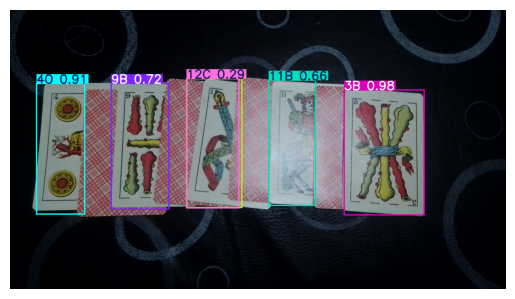


0: 608x640 1 2O, 1 4C, 1 4E, 395.9ms
Speed: 21.6ms preprocess, 395.9ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 640)


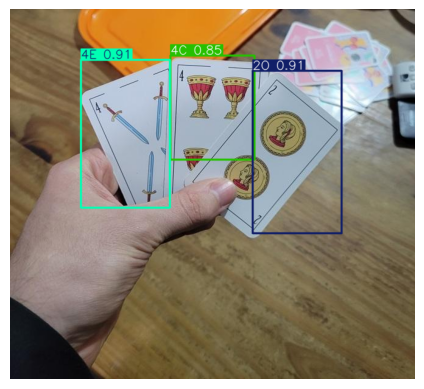


0: 640x480 1 1O, 1 2O, 1 3O, 1 6B, 1 7E, 1 7B, 1 11B, 1 12B, 286.7ms
Speed: 4.1ms preprocess, 286.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


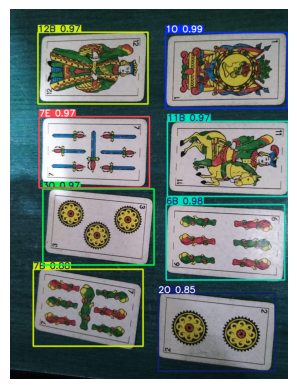


0: 640x480 4 2Cs, 4 2Bs, 1 5O, 1 6O, 2 9Bs, 1 10B, 108.3ms
Speed: 4.5ms preprocess, 108.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


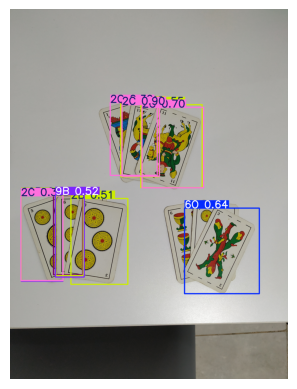


0: 640x480 1 3O, 1 5E, 1 6E, 89.7ms
Speed: 2.5ms preprocess, 89.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


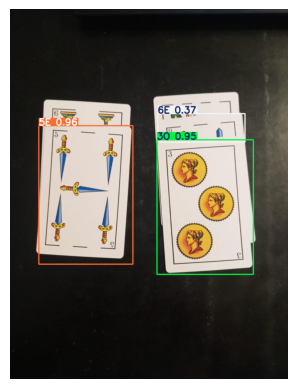


0: 640x480 1 1C, 1 6O, 2 11Os, 1 12C, 1 12B, 79.4ms
Speed: 4.3ms preprocess, 79.4ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 480)


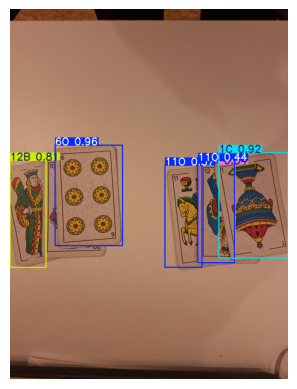


0: 640x384 1 1B, 1 2B, 1 3B, 1 4B, 1 5B, 1 6B, 1 8B, 1 9B, 1 10C, 1 11E, 1 12B, 159.3ms
Speed: 4.2ms preprocess, 159.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)


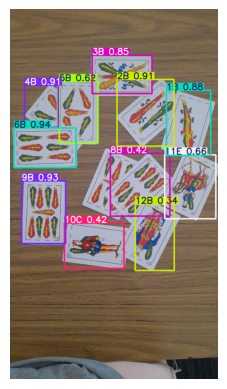


0: 640x512 2 10Os, 169.6ms
Speed: 4.8ms preprocess, 169.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 512)


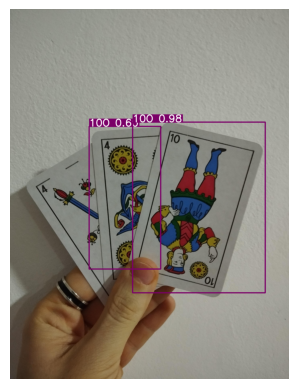


0: 640x480 1 3C, 1 4C, 1 8O, 307.5ms
Speed: 5.1ms preprocess, 307.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 480)


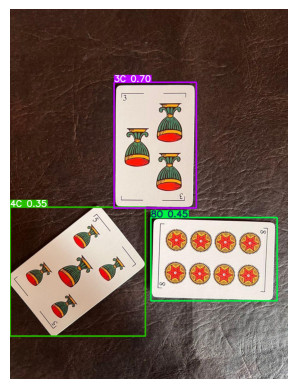


0: 480x640 1 4C, 1 4E, 1 7O, 1 7B, 1 10C, 1 11B, 123.6ms
Speed: 3.5ms preprocess, 123.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


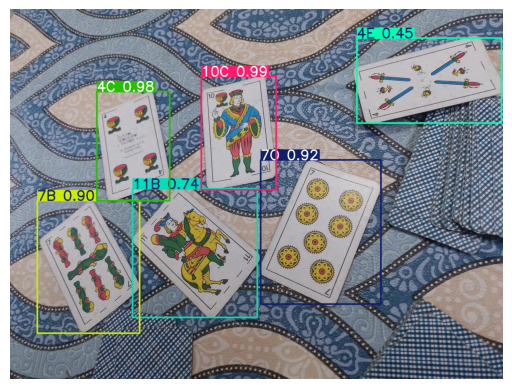

In [58]:
# Visualización de algunas detecciones
def visualize_detections(model, images_dir, num_images=10):
    image_files = [os.path.join(images_dir, f) for f in os.listdir(images_dir) if f.endswith('.jpg')]
    
    # Seleccionar imágenes al azar
    random_images = random.sample(image_files, min(num_images, len(image_files)))
    
    for i, image_path in enumerate(random_images):
        img = Image.open(image_path)
        results = model(img)
        
        # Iterar sobre los resultados y plotear las detecciones
        for result in results:
            annotated_img = result.plot()
            
            # Convertir de BGR a RGB
            annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
            
            # Mostrar la imagen anotada
            plt.imshow(annotated_img_rgb)
            plt.axis('off')
            plt.savefig(os.path.join(results_dir, f'detection_{i}.png'))
            plt.show()

# Ruta de los resultados
results_dir = './Results'
retrained_model_path = './Results/yolov8_retraining/weights/best.pt'

# Cargar el modelo YOLOv8
model = YOLO(retrained_model_path) 

# Directorio de validación
val_images = os.path.join('./Data/Splitted_Dataset/val/images')

# Llamado a la función
visualize_detections(model, val_images)

# 7. Reentrenamiento

Esta celda es para reentrenar el modelo a placer. Carga el mejor modelo de reentrenamiento para seguir el entrenamiento. Modificar los parámetros de retrain_yolov8() a voluntad para personalizar el reentrenamiento.

In [ ]:
# Función para cargar y continuar el entrenamiento del modelo YOLOv8
def retrain_yolov8(name='yolov8_retraining', checkpoint_path, data_path, results_dir, epochs=10, batch_size=16, img_size=640, learning_rate=0.01, final_lr=0.01, l2_regularization=0.0005, momentum=0.937):
    # Cargar modelo YOLOv8 desde el checkpoint
    model = YOLO(checkpoint_path) 

    # Configurar entrenamiento
    model.train(data=data_path,
                epochs=epochs,
                batch=batch_size,
                lr0=learning_rate,
                lrf=final_lr,
                weight_decay=l2_regularization,
                imgsz=img_size,
                project=results_dir,
                momentum=momentum,
                name=name,
                exist_ok=True)

    # Evaluar modelo en conjunto de validación
    metrics = model.val()

    # Mostrar métricas
    print("Metrics: ", metrics)

    # Guardar métricas en un archivo
    with open(os.path.join(results_dir, 'metrics.txt'), 'a') as f:
        f.write(f'\n\nRetraining_2 Metrics: {metrics}')

    return model

# Rutas a directorios
dataset_path = os.path.abspath('/home/salvanya/TP-CV2/Results/yolov8_retraining/weights/best.pt')
results_dir = './Results'

# Directorio para los checkpoints
checkpoints_dir = os.path.join(results_dir, 'checkpoints')
if not os.path.exists(checkpoints_dir):
    os.makedirs(checkpoints_dir)

# Ruta al último checkpoint
last_checkpoint_path = os.path.join(results_dir, 'weights/best.pt')  

# Reentrenamiento con nuevos hiperparámetros
model = retrain_yolov8(name='yolov8_retraining',
                       checkpoint_path=last_checkpoint_path, 
                       data_path=dataset_path, 
                       results_dir=results_dir, 
                       epochs=15, # Cantidad de épocas
                       batch_size=16, # Tamaño del lote 
                       img_size=640, # Tamaño de imagen
                       learning_rate=0.01, # Tasa de aprendizaje 
                       final_lr=0.01, # Porcentaje final de la tasa de aprendizaje inicial
                       l2_regularization=0.0005, # Término de regularización L2 (Ridge)
                       momentum=0.937 # Factor de Momentum para la optimización
                       )

# Guardar el nuevo checkpoint
new_checkpoint_path = os.path.join(checkpoints_dir, 'retrained_2_checkpoint.pt')
model.save(new_checkpoint_path)

print("Reentrenamiento completado y modelo guardado.")